In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST", one_hot=True)

batch_size, learning_rate = 64, 0.01

ae_weights = {
    "conv"      : tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1)),
    "b_hidden"  : tf.Variable(tf.truncated_normal([4], stddev=0.1)),
    "deconv"    : tf.Variable(tf.truncated_normal([5, 5, 1, 4], stddev=0.1)),
    "b_visible" : tf.Variable(tf.truncated_normal([1], stddev=0.1))
}

input_shape = tf.stack([batch_size, 28, 28, 1])
ae_input = tf.placeholder(tf.float32, [None, 784])
images = tf.reshape(ae_input, [-1, 28, 28, 1])

hidden_logits = tf.nn.conv2d(images, ae_weights["conv"], 
                             strides=[1, 2, 2, 1], padding="SAME") + ae_weights["b_hidden"]
hidden = tf.nn.sigmoid(hidden_logits)

visible_logits = tf.nn.conv2d_transpose(hidden, ae_weights["deconv"], input_shape, 
                                        strides=[1, 2, 2, 1], padding= "SAME") + ae_weights["b_visible"]
visible = tf.nn.sigmoid(visible_logits)

optimizer = tf.train.AdagradOptimizer(learning_rate)
conv_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=visible_logits, labels=images))
conv_op = optimizer.minimize(conv_cost)

# точность
accuracy = tf.reduce_mean(1 - tf.abs(ae_input - visible))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(100000):
    x_batch, _ = mnist.train.next_batch(batch_size)
    sess.run(conv_op, feed_dict={ae_input: x_batch})

# print("\nAccuracy", sess.run(accuracy, feed_dict={ae_input: mnist.test.images}))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


InvalidArgumentError: Conv2DCustomBackpropInput: input and out_backprop must have the same batch sizeinput batch: 64outbackprop batch: 10000 batch_dim: 0
	 [[Node: conv2d_transpose_2 = Conv2DBackpropInput[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](stack_4, Variable_22/read, Sigmoid_4)]]

Caused by op 'conv2d_transpose_2', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/bekin/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/bekin/.local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/bekin/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/bekin/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bekin/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/bekin/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/bekin/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/bekin/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bekin/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/bekin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bekin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bekin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-1619f793995c>", line 25, in <module>
    strides=[1, 2, 2, 1], padding= "SAME") + ae_weights["b_visible"]
  File "/home/bekin/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1257, in conv2d_transpose
    name=name)
  File "/home/bekin/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 805, in conv2d_backprop_input
    dilations=dilations, name=name)
  File "/home/bekin/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/bekin/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/home/bekin/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Conv2DCustomBackpropInput: input and out_backprop must have the same batch sizeinput batch: 64outbackprop batch: 10000 batch_dim: 0
	 [[Node: conv2d_transpose_2 = Conv2DBackpropInput[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](stack_4, Variable_22/read, Sigmoid_4)]]


Оригинал и реконструированные:


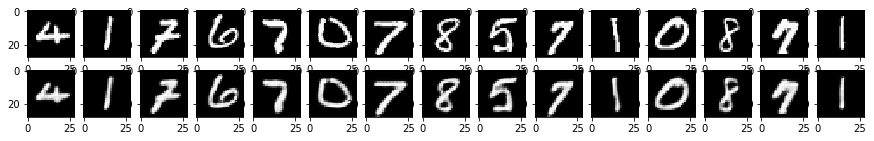

In [9]:
import matplotlib.pyplot as plt
import math

# Reshape the array into 28 x 28 array (2-dimensional array)
img_ae_input = tf.reshape(ae_input, [-1, 28, 28])
img_visible = tf.reshape(visible, [-1, 28, 28])
# img_noised_visible = tf.reshape(noised_visible, [-1, 28, 28])

inp_pics, out_pics = sess.run(
    [img_ae_input, img_visible], 
    feed_dict={ae_input: x_batch})

examples_cnt = 15

print("Оригинал и реконструированные:")
plt.figure(figsize=(15, 2))
for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, i + 1)
    plt.imshow(inp_pics[i], cmap='gray')

for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, examples_cnt + i + 1)
    plt.imshow(out_pics[i], cmap='gray')   
plt.show()

# print("Оригинал и восстановленные из «обрезанного» скрытого слоя:")
# plt.figure(figsize=(15, 2))
# for i in range(examples_cnt):
#     plt.subplot(2, examples_cnt, i + 1)
#     plt.imshow(inp_pics[i], cmap='gray')

# for i in range(examples_cnt):
#     plt.subplot(2, examples_cnt, examples_cnt + i + 1)
#     plt.imshow(noised_out_pics[i], cmap='gray')
# plt.show()